<a href="https://colab.research.google.com/github/Kumarraja25/DL/blob/main/ANN_model_11_07_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np
import matplotlib.pyplot as plt

load the data set

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


check the samples in training and testing sets

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


check the availibility of images

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

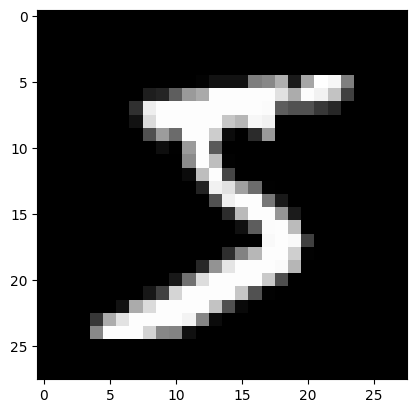

In [12]:
plt.imshow(x_train[0],cmap='gray')

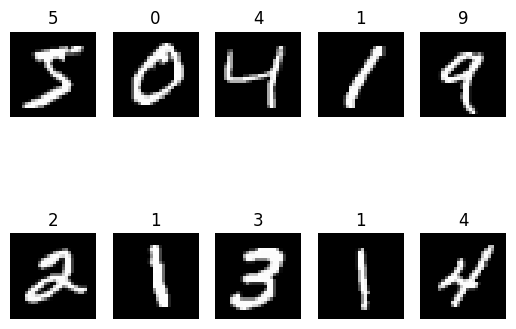

In [18]:
for i in range(10):
  ax=plt.subplot(2,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')
  plt.show

Normalize the data

In [23]:
x_train=x_train/255
x_test=x_test/225
x_train[0].shape

(28, 28)

##Reshape the input array

In [26]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [28]:
x_train_flat.shape

(60000, 784)

In [29]:
x_test_flat.shape

(10000, 784)

## Create the ANN model

In [31]:
ann=Sequential()
ann.add(Dense(10,activation='softmax',input_dim=784))

In [32]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


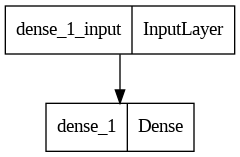

In [35]:
from keras.utils import plot_model
plot_model(ann)

##Compile the ANN model

In [38]:
# search keras losses
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Train the Datasets

In [40]:
ann.fit(x_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3012 - accuracy: 0.1114
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3003 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2995 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2988 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2980 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2973 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2965 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2958 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2950 - accuracy: 0.1124
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.294

In [41]:
ann.fit(x_train_flat,y_train,epochs=10,batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 4ms/step - loss: 2.2937 - accuracy: 0.1124
Epoch 2/10
120/120 [==============================] - 1s 4ms/step - loss: 2.2936 - accuracy: 0.1124
Epoch 3/10
120/120 [==============================] - 0s 4ms/step - loss: 2.2936 - accuracy: 0.1124
Epoch 4/10
120/120 [==============================] - 1s 4ms/step - loss: 2.2935 - accuracy: 0.1124
Epoch 5/10
120/120 [==============================] - 0s 4ms/step - loss: 2.2935 - accuracy: 0.1124
Epoch 6/10
120/120 [==============================] - 0s 4ms/step - loss: 2.2934 - accuracy: 0.1124
Epoch 7/10
120/120 [==============================] - 0s 4ms/step - loss: 2.2934 - accuracy: 0.1124
Epoch 8/10
120/120 [==============================] - 0s 4ms/step - loss: 2.2933 - accuracy: 0.1124
Epoch 9/10
120/120 [==============================] - 1s 4ms/step - loss: 2.2932 - accuracy: 0.1124
Epoch 10/10
120/120 [==============================] - 0s 4ms/step - loss: 2.2932 - accuracy: 0.1124

## Evaluate the model

In [42]:
ann.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2891 - accuracy: 0.1135


[2.2890989780426025, 0.11349999904632568]

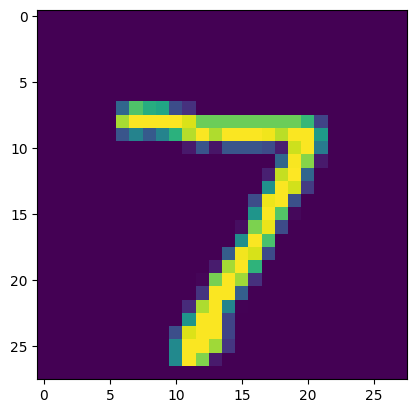

In [52]:
plt.imshow(x_test[0])

In [53]:
ann.predict(x_test_flat)

313/313 [==============================] - 0s 1ms/step


array([[0.09849033, 0.11189052, 0.09887414, ..., 0.1062659 , 0.09710457,
        0.09986988],
       [0.09922051, 0.11227923, 0.10023883, ..., 0.10315683, 0.0975769 ,
        0.09821655],
       [0.09805049, 0.1141675 , 0.09924255, ..., 0.10452827, 0.09718499,
        0.09904221],
       ...,
       [0.09798209, 0.11165181, 0.0988799 , ..., 0.10493045, 0.09790049,
        0.10005867],
       [0.09877799, 0.11241091, 0.09908881, ..., 0.10446572, 0.09783493,
        0.09908655],
       [0.10046031, 0.11062636, 0.1001657 , ..., 0.10302521, 0.09711989,
        0.09861735]], dtype=float32)

In [54]:
np.argmax(ann.predict(x_test_flat)[0]) # oh no it give an error in output

313/313 [==============================] - 1s 2ms/step


1

In [ ]:
# plt.figure(figsize=(8,5))
# import seaborn as sns
# cm=tf.math.confusion_matrix(y_test,y_predicted_labels)
# sns.heatmap

## Create another ANN model with hidden layer

In [56]:
ann1=Sequential()
ann1.add(Flatten(input_dim=784))
ann1.add(Dense(150,activation='relu'))
ann1.add(Dense(100,activation='relu'))
ann1.add(Dense(10,activation='softmax'))

In [57]:
ann1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 150)               117750    
                                                                 
 dense_6 (Dense)             (None, 100)               15100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 133860 (522.89 KB)
Trainable params: 133860 (522.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


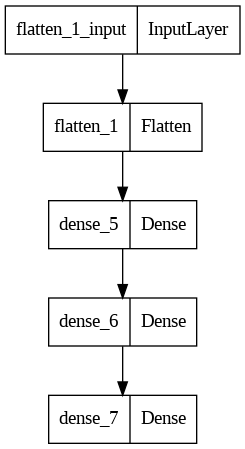

In [60]:
from keras.utils import plot_model
plot_model(ann1)

In [66]:
ann1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
ann1.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3015 - accuracy: 0.1111
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124
